<a href="https://colab.research.google.com/github/Rheilly/BSIS2A/blob/main/Salary_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/PGaea/Butardo_DAF/da2681d891071e1bb5cca7dfb702d492c592728f/Salary_Data1.csv ')

In [26]:
print(df)

       Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4                    20.0  200000.0  
...

In [27]:
print("\nMissing Values Before Cleaning:")
print(df.isna().sum())


Missing Values Before Cleaning:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [28]:
df = df.dropna()

In [29]:
print("\nMissing Values After Cleaning:")
print(df.isna().sum())


Missing Values After Cleaning:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [30]:
X = df[['Years of Experience']]
y = df['Salary']

In [31]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [32]:
print(f"\nIntercept (β₀): {model.intercept_}")
print(f"Coefficient (β₁): {model.coef_[0]}")


Intercept (β₀): 58284.685676958085
Coefficient (β₁): 7046.734456548321


In [33]:
y_pred = model.predict(X)

In [34]:
X_with_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_with_const).fit()

In [35]:
print(f"\nModel Summary (using statsmodels):\n{ols_model.summary()}")


Model Summary (using statsmodels):
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:30:34   Log-Likelihood:                -78780.
No. Observations:                6698   AIC:                         1.576e+05
Df Residuals:                    6696   BIC:                         1.576e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

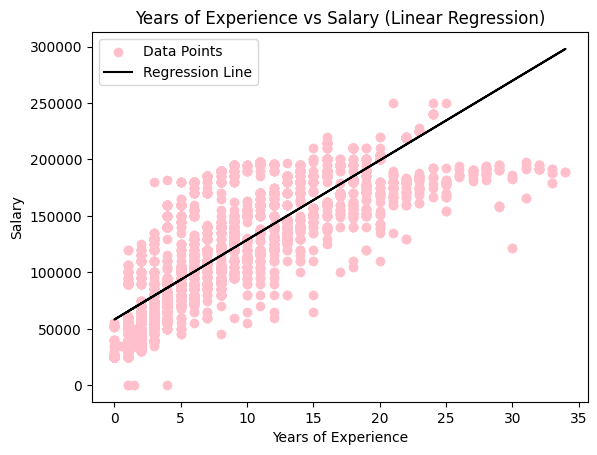

In [42]:
plt.scatter(X, y, color='pink', label='Data Points')
plt.plot(X, y_pred, color='black', label='Regression Line')
plt.title("Years of Experience vs Salary (Linear Regression)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

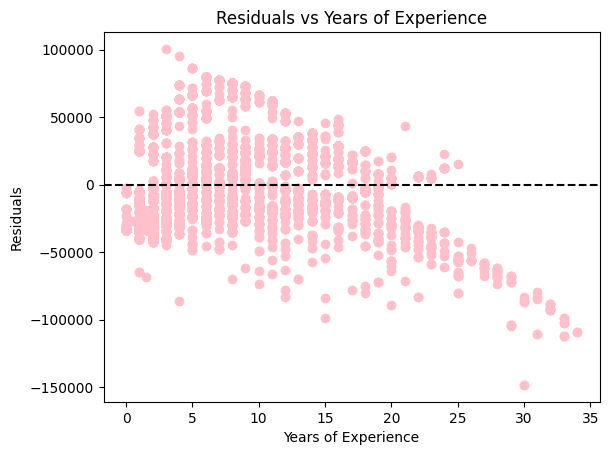

In [40]:
residuals = y - y_pred
plt.scatter(X, residuals, color='pink')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Residuals")
plt.show()

In [39]:
print(f"\nMaximum predicted Salary: {y_pred.max()}")
print(f"Minimum predicted Salary: {y_pred.min()}")


Maximum predicted Salary: 297873.657199601
Minimum predicted Salary: 58284.685676958085
